In [1]:
#Bibliotecas:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy import exp

In [19]:
# Dados:
df = pd.read_csv('iris.data', header = None)
df.columns = ['Sepal Lenght (cm)','Sepal Width (cm)','Petal Lenght (cm)','Petal Width (cm)', 'target']
X = df.drop('target',1)
Y = df['target']
df

,Sepal Lenght (cm),Sepal Width (cm),Petal Lenght (cm),Petal Width (cm),target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# Cálculos para a obtenção do PCA:

# Média por coluna de X:
mean_vec = np.mean(X, axis=0)
mean_vec

# Desvio Padrão por coluna de X:
std = np.std(X, axis=0)
std

# Normalização:
R = (X - mean_vec)/std
R

# Teste para ver se a normalização foi efetuada corretamente:
TestNorm=R.loc[:,].values
np.mean(TestNorm),np.std(TestNorm)

# Matriz de Correlação:
C = R.T.dot(R)/(X.shape[0] - 1)
C

# Determinação de Autovalores e Autovetores:
autoval, autovet = np.linalg.eig(C)

# Ordenação dos Autovalores em ordem decrescente:
pares_de_autos = [(np.abs(autoval[i]),autovet[:,i])for i in range(len(autoval))]
pares_de_autos.sort(reverse = True)

# Calculo da Variância Explicada e Variância Acumulada:
tot = sum(autoval)
var_exp = [(i/tot)*100 for i in sorted(autoval, reverse = True)]
cum_var_exp = np.cumsum(var_exp)

In [4]:
# Visualização das informações
x = ['PC %s' %i for i in range (1, len(autoval)+1)]
df_PCA = pd.DataFrame({'AutoValores': autoval, 'Variancia Explicada Cumulativa': cum_var_exp, 'Variância Explicada': var_exp, 'Componente':x})
df_PCA

,AutoValores,Variancia Explicada Cumulativa,Variância Explicada,Componente
0,2.930354,72.770452,72.770452,PC 1
1,0.927404,95.800975,23.030523,PC 2
2,0.148342,99.484807,3.683832,PC 3
3,0.020746,100.000000,0.515193,PC 4


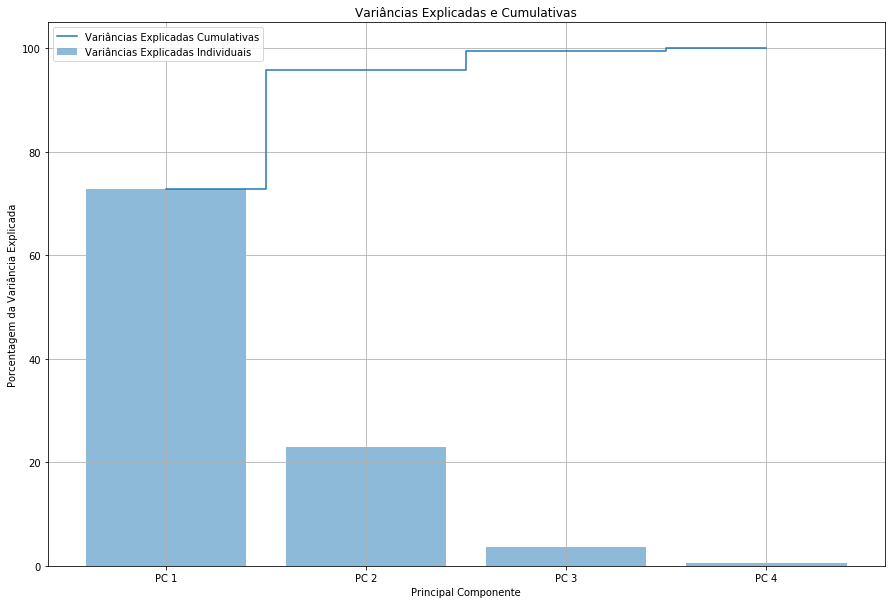

In [20]:
#Plot do gráfico para análise das Variâncias Explicadas e Cumulativas:
def plot_var_exp(x):
    fig, ax = plt.subplots(figsize=(15,10))
    columns = x
    plt.bar(x= range(1,5), height=var_exp, alpha=0.5,align='center', label='Variâncias Explicadas Individuais', tick_label=columns)
    plt.step(range(1,5), cum_var_exp, where='mid', label='Variâncias Explicadas Cumulativas')
    plt.ylabel('Porcentagem da Variância Explicada')
    plt.xlabel('Principal Componente')
    plt.title('Variâncias Explicadas e Cumulativas')
    ax.grid()
    plt.legend()
    plt.savefig('Variâncias Explicadas e Cumulativas.png')
plot_var_exp(x)

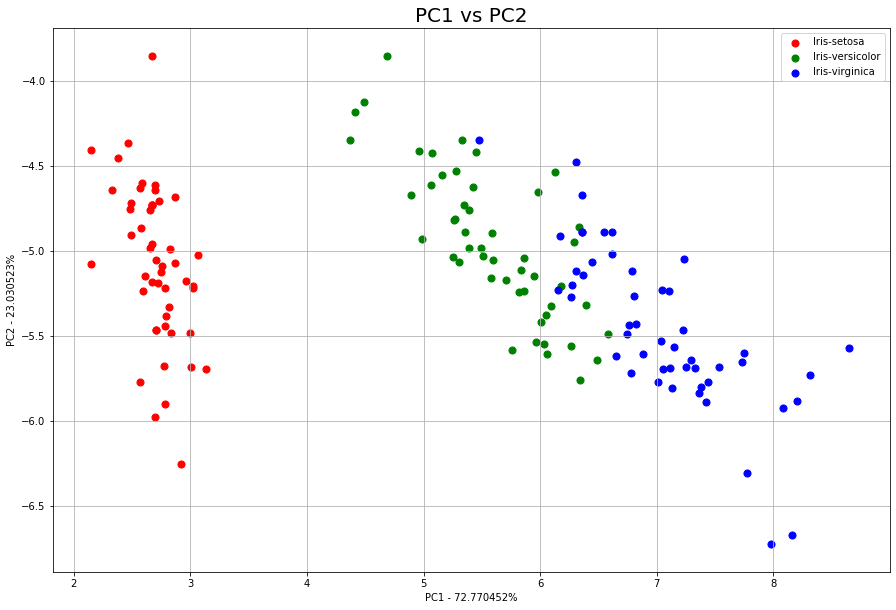

In [21]:
#Visualização gráfica dos dados PCA:
n = 2
autovetores = [p[1] for p in pares_de_autos]
A = autovetores[0:n]
X_PCA = np.dot(X, np.array(A).T)
new_df_PCA = pd.DataFrame(X_PCA, columns = ['PC1', 'PC2'])
new_df_PCA['target'] = df['target']

# Plot do gráfico PC1 x PC2
def plot_PCA(new_df_PCA):
    fig = plt.figure(figsize = (15,10))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('PC1 - 72.770452%')
    ax.set_ylabel('PC2 - 23.030523%')

    ax.set_title('PC1 vs PC2', fontsize = 20)

    targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

    colors = ['r', 'g', 'b']

    for target, color in zip(targets,colors):
        indicesToKeep = new_df_PCA['target'] == target
        ax.scatter(new_df_PCA.loc[indicesToKeep, 'PC1'], new_df_PCA.loc[indicesToKeep, 'PC2'], c = color, s = 50)
    
    ax.legend(targets)
    ax.grid()
    plt.savefig('PC1 vs PC2.png')
plot_PCA(new_df_PCA)

In [10]:
# Conjunto de dados reduzidos PCA:
new_df_PCA

,PC1,PC2,target
0,2.669231,-5.180887,Iris-setosa
1,2.696434,-4.643645,Iris-setosa
2,2.481163,-4.752183,Iris-setosa
3,2.571512,-4.626615,Iris-setosa
4,2.590658,-5.236211,Iris-setosa
...,...,...,...
145,7.033251,-5.531352,Iris-virginica
146,6.613485,-4.889261,Iris-virginica
147,6.759094,-5.437263,Iris-virginica
148,6.782974,-5.719634,Iris-virginica


In [7]:
# Cálculos para a obtenção do KPCA:

# Cálculo das distâncias euclidianas ao quadrado para cada par de pontos para matriz MxN:
sq_dists = pdist(X, 'sqeuclidean')

# Convertendo as distâncias aos pares em uma matriz MxM simétrica:
mat_sq_dists = squareform(sq_dists)

# Computando a matriz de Kernel MxM:
K = np.exp(-15 * mat_sq_dists)

# Centralizando a matriz simétrica do NxN de Kernel:
N = K.shape[0]
one_n = np.ones((N,N)) / N
K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

# Obtendo os Autovalores em ordem decrescente com Autovetores correspondentes da matriz simétrica:
kautoval, kautovet = np.linalg.eig(K)
kpares_de_autos = [(np.abs(kautoval[j]),kautovet[:,j])for j in range(len(kautoval))]
kpares_de_autos.sort(reverse=True)

# Obtenção das colunas referentes a KPC1 e KPC2
X_KPCA = np.column_stack((kautovet[:,i] for i in range(0,2)))

C:\Users\erhon\anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


In [8]:
# Conjunto de dados reduzidos KPCA:
new_df_KPCA = pd.DataFrame({'KPC1': X_KPCA[:,0], 'KPC2': X_KPCA[:,1], 'target':Y})
new_df_KPCA

,KPC1,KPC2,target
0,0.266095,0.234280,Iris-setosa
1,0.155517,-0.248489,Iris-setosa
2,0.084700,-0.151957,Iris-setosa
3,0.079050,-0.185594,Iris-setosa
4,0.189748,0.185360,Iris-setosa
...,...,...,...
145,-0.038189,0.003667,Iris-virginica
146,-0.036597,0.003512,Iris-virginica
147,-0.041215,0.003977,Iris-virginica
148,-0.034451,0.003284,Iris-virginica


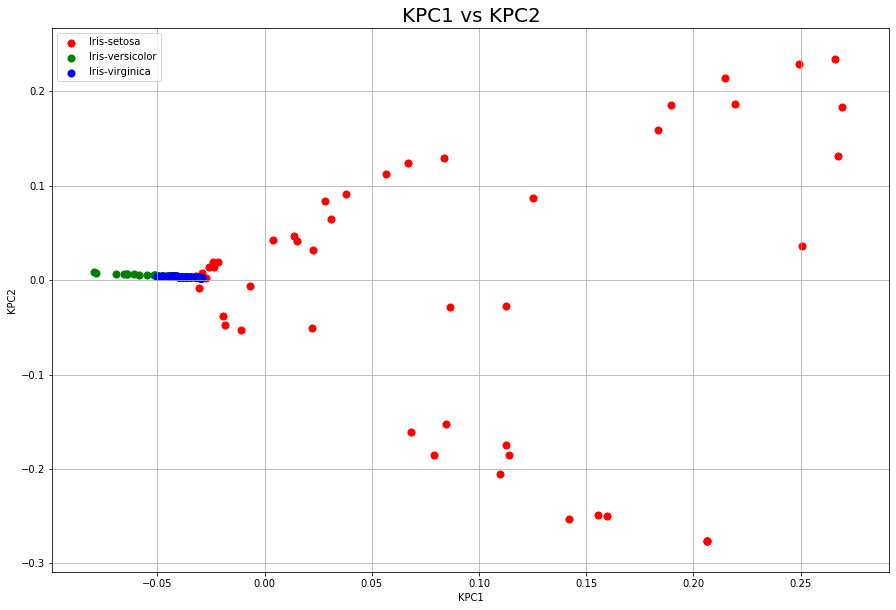

In [24]:
# Plot do gráfico KPC1 x KPC2
def plot_PCA(new_df_KPCA):
    fig = plt.figure(figsize = (15,10))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('KPC1')
    ax.set_ylabel('KPC2')

    ax.set_title('KPC1 vs KPC2', fontsize = 20)

    targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
    colors = ['r', 'g', 'b']

    for target, color in zip(targets,colors):
        indicesToKeep = new_df_KPCA['target'] == target
        ax.scatter(new_df_KPCA.loc[indicesToKeep, 'KPC1'], new_df_KPCA.loc[indicesToKeep, 'KPC2'], c = color, s = 50)
    
    ax.legend(targets)
    ax.grid()
    plt.savefig('KPC1 vs KPC2.png')
plot_PCA(new_df_KPCA)